# <center> Imágenes y Machine Learning en Python

CLASE 12

Una vez más importamos las librerías utilizadas en la anterior notebook y cargamos las librerías e imágenes a trabajar correspondientes.

In [1]:
import tensorflow
from tensorflow import keras
#from keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

## Dataset CIFAR Keras

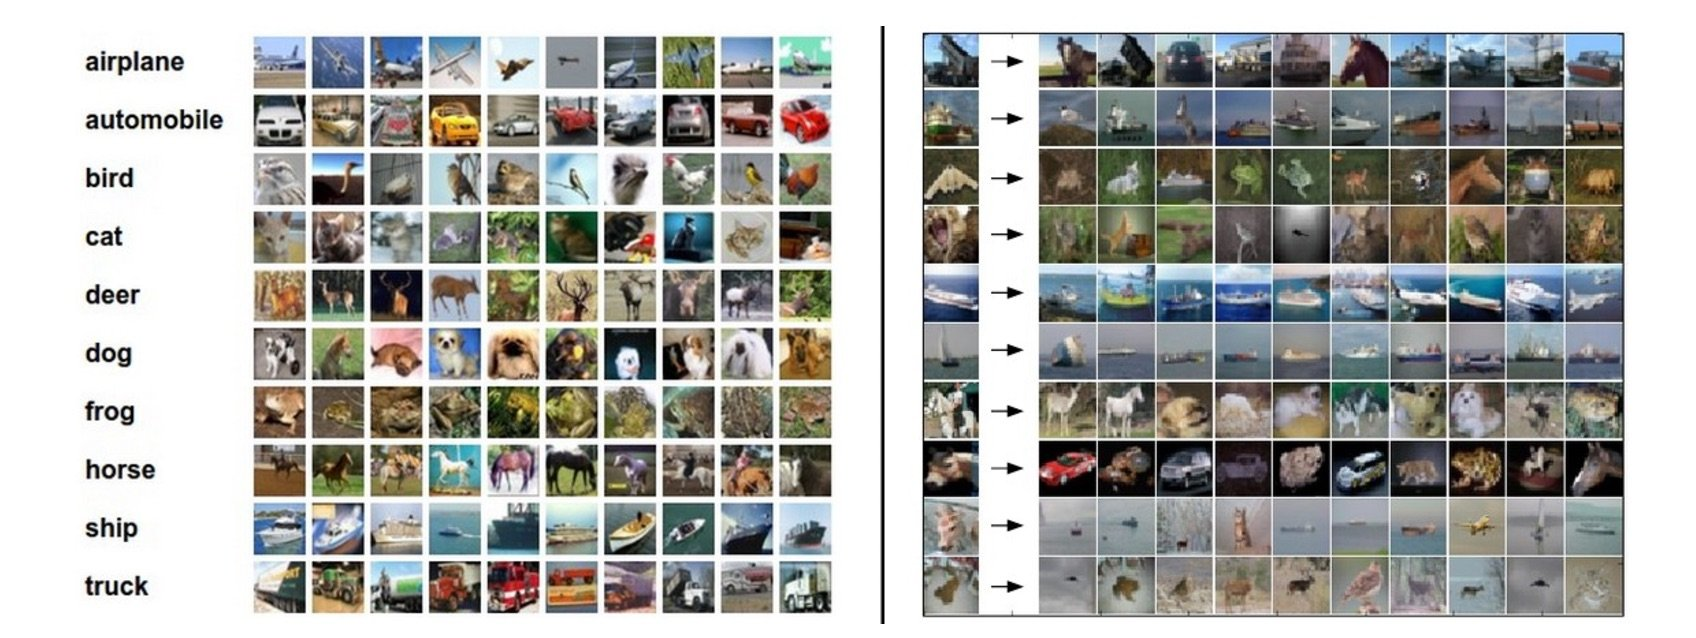

## Carga de datos

Cargamos el dataset desde la librería Keras con la siguiente línea de código:

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


Verificamos su formato

In [3]:
type(X_train)

numpy.ndarray

Exploramos las dimensiones del dataset

In [4]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Exploración de Datos

Verificamos la distribución por clases tanto en los datos de entrenamiento como en los datos de prueba

In [5]:
unicos, cantidad = np.unique(y_train, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad: {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5 6 7 8 9], y a cada número le corresponde la siguente cantidad: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


Ejercicio: elegir una imagen de conj de test de la base y mostrarla, junto a su etiqueta

In [6]:
unicos, cantidad = np.unique(y_test, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5 6 7 8 9], y a cada número le corresponde la siguente cantidad [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


Mostramos 10 imágenes al azar con su respectiva etiqueta

La posición de la imagen a mostrar es la 43150
La etiqueta de la imagen es: [7]


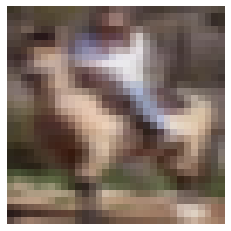

La posición de la imagen a mostrar es la 35614
La etiqueta de la imagen es: [6]


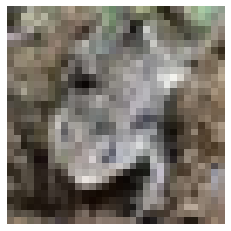

La posición de la imagen a mostrar es la 47282
La etiqueta de la imagen es: [2]


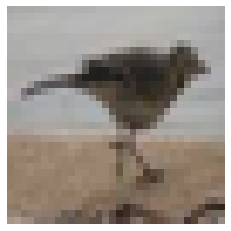

La posición de la imagen a mostrar es la 2642
La etiqueta de la imagen es: [0]


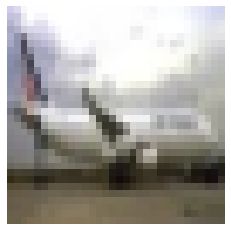

La posición de la imagen a mostrar es la 2858
La etiqueta de la imagen es: [4]


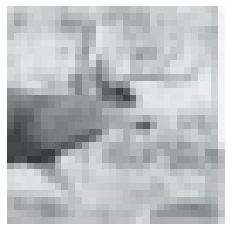

La posición de la imagen a mostrar es la 45063
La etiqueta de la imagen es: [9]


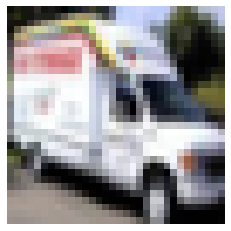

La posición de la imagen a mostrar es la 1734
La etiqueta de la imagen es: [9]


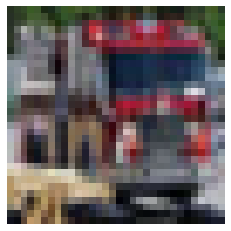

La posición de la imagen a mostrar es la 32981
La etiqueta de la imagen es: [2]


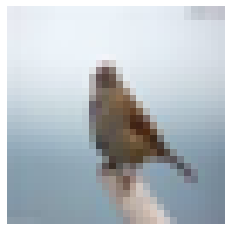

La posición de la imagen a mostrar es la 47121
La etiqueta de la imagen es: [9]


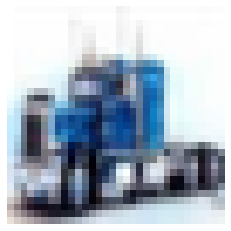

La posición de la imagen a mostrar es la 14586
La etiqueta de la imagen es: [9]


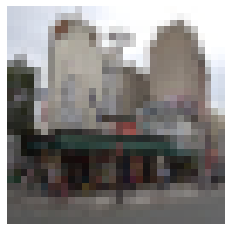

In [7]:
for i in range(10):
    numero = np.random.randint(low = 0, high = 50000)
    print(f'La posición de la imagen a mostrar es la {numero}')
    print(f'La etiqueta de la imagen es: {y_train[numero]}')
    plt.imshow(X_train[numero, :, :], cmap = 'gray')
    plt.axis('off')
    plt.show()

## Procesamiento de Datos

Convertimos las etiquetas en formato One - Hot

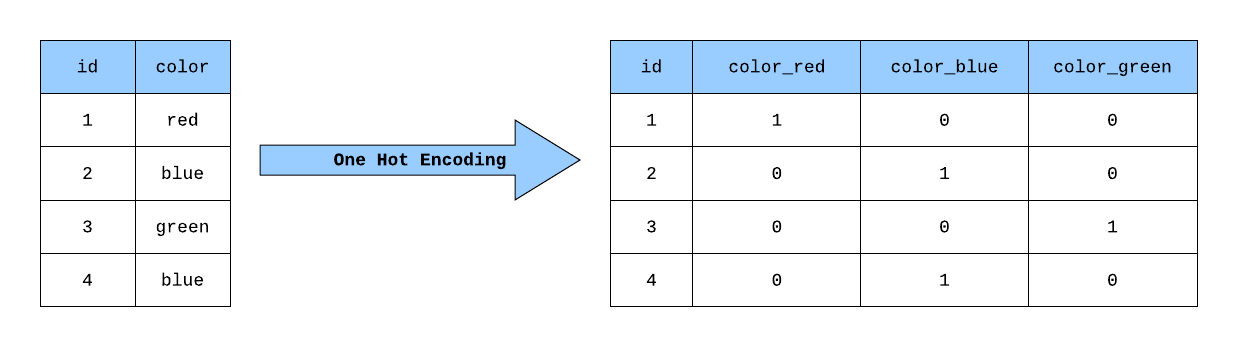

In [8]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Redes Neuronales Convolucionales

## Definición por capas

Esta vez, empezamos a trabajar con redes neuronales convolucionales, que como dijimos anteriormente son las más indicadas para poder trabajar con imágenes médicas debido a su capacidad de conservar la vecindad entre píxeles y de detección de patrones sin variar durante la traslación. Su utilización es la misma que la de las redes neuronales tradicionales o fully connected puesto que se importan también desde el módulo "layers".

## Capa de Entrada

La entrada se define de la misma manera que en la notebook anterior, con el método "Input", la única salvedad es la manera en la que definimos la dimensión de la red. En este caso, introducimos la imagen como matriz dado que deseamos conservar la vecindad de los píxeles de las mismas.

In [9]:
Imagen_de_entrada = layers.Input(shape = (32, 32, 3))

## Capa de Convolución

Luego de definir las entradas de la red, definimos las capas de convolución. Del módulo "layers" importamos el método "Conv2D". 

Al igual que las tradicionales, a las redes convolucionales hay que asignarle una función de activación que puedan utilizar para el aprendizaje. 

Además hay que asignar otros parámetros:

* filters: La cantidad de filtros que realizarán la operación de convolución en los datos de entrada.

* kernel_size: La dimensión de los filtros utilizados en la capa para realizar la convolución en los datos de entrada. Se suelen usar filtros con dimensión (3 x 3) o (5 x 5).

En este caso, vamos a dejar la función de activación con el valor "None" dado que no vamos aplicarla en este preciso instante ya que, luego de aplicar una capa de convolución, proseguiremos a aplicar una capa de normalización.

In [10]:
X = layers.Conv2D(filters = 12, kernel_size = (3, 3), activation = None)(Imagen_de_entrada)

## Capa de Normalización

Otra capa utilizada en este tipo de red, es la capa denominada "BatchNormalization()" Que permite aplicar a cada lote que pasa por cada capa a la salida, la siguiente fórmula:

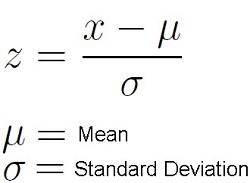

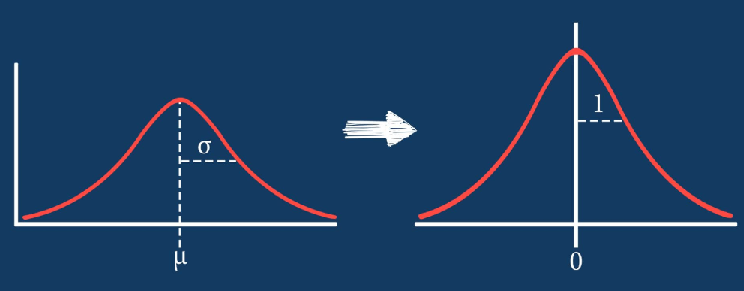

Se obtienen datos normalizados en donde la media se centra en 0 y el desvío estandar en 1. A partir de este método, mejora tanto la interpretación abstracta sobre los datos que ingresan a la red, así como la capacidad de minimizar la función de coste con el optimizador puesto que la actualización de los parámetros se hace de forma más homogenea como se ve en la siguiente gráfica:

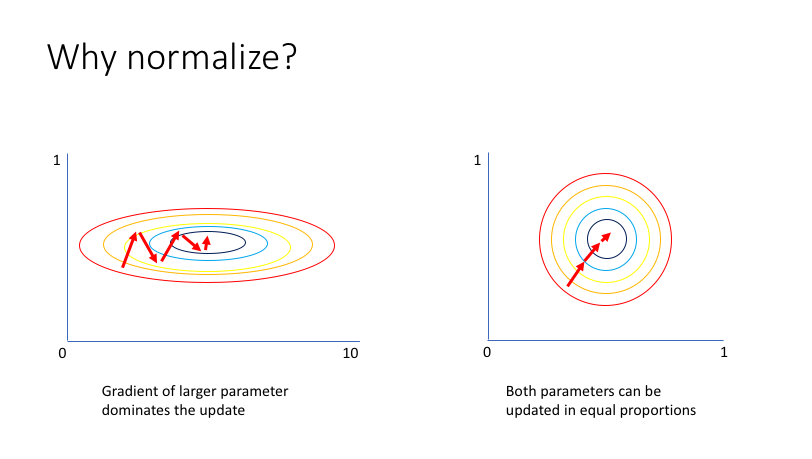

In [11]:
X = layers.BatchNormalization()(X)

X = layers.Activation("relu")(X)

Luego de haber normalizado, aplicamos una función de activación a los resultados normalizados. Por eso dejamos con "None" el argumento de la función de activación de la capa anterior, para poder aplicarla en este instante.

## Capa de Max - Pooling

La última capa que debemos explicar de manera práctica es la capa de Pooling, que posee como argumentos:

* pool_size: Dimensión de los elementos en el que se realizará el pooling.

In [12]:
X = layers.MaxPooling2D(pool_size = (2, 2))(X)

In [13]:
X = layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = None)(X)

X = layers.BatchNormalization()(X)

X = layers.Activation("relu")(X)

Flatten = layers.Flatten()(X)

Notar que acá pasamos a las capas totalmente conectadas:

In [14]:
X = layers.Dense(256, activation = "sigmoid")(Flatten)

X = layers.Dense(64, activation = "sigmoid")(X)

Salida = layers.Dense(units = 10, activation = 'softmax')(Flatten)

Definimos la red:

In [15]:
Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

Red_Neuronal.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Ahora entrenamos!! paciencia... lleva su tiempo

In [16]:
Historia = Red_Neuronal.fit(x = X_train, y = y_train, epochs = 9, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/9
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4098 - accuracy: 0.5347 - val_loss: 1.2849 - val_accuracy: 0.5578
Epoch 2/9
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9498 - accuracy: 0.6694 - val_loss: 1.0531 - val_accuracy: 0.6344
Epoch 3/9
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8123 - accuracy: 0.7213 - val_loss: 1.1691 - val_accuracy: 0.6119
Epoch 4/9
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7165 - accuracy: 0.7513 - val_loss: 1.1548 - val_accuracy: 0.6225
Epoch 5/9
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6324 - accuracy: 0.7835 - val_loss: 1.0414 - val_accuracy: 0.6526
Epoch 6/9
1563/1563 [==============================] - 63s 40ms/step - loss: 0.5590 - accuracy: 0.8067 - val_loss: 1.4508 - val_accuracy: 0.5815
Epoch 7/9
1563/1563 [==============================] - 63s 40ms/step - loss: 0.4910 - accuracy: 0.8293 - val_loss: 1.1983 - val_ac

In [17]:
Red_Neuronal.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 12)        336       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 12)       48        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 30, 12)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        6976  

## Ilustración de Métricas de la Red

Puedo almacenar los valores obtenidos durante el entrenamiento de la red y graficarlos.

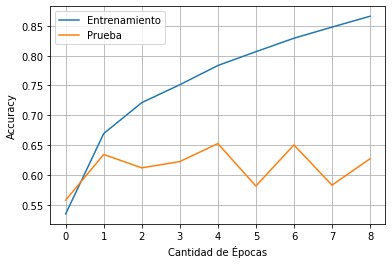

In [18]:
plt.plot(Historia.history['accuracy'], label = 'Entrenamiento')
plt.plot(Historia.history['val_accuracy'], label = 'Prueba')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Se puede guardar el modelo utilizando el siguiente método:

In [19]:
Red_Neuronal.save('Modelo_Satelital.h5') #ver datos (virtuales), guardarlo en PC (archivos)

Se puede usar el siguiente comando para cargar un modelo:

In [20]:
Red_Neuronal = keras.models.load_model('Modelo_Satelital.h5')

## Acceso a capas ocultas

Puedo acceder a las capas de los modelos de redes neuronales y visualizar cada salida utilizando el atributo ".layers"

Almaceno las salidas de las capas en una lista para poder visualizarlas.

In [21]:
capas_salida = [capa.output for capa in Red_Neuronal.layers]

Puedo crear un modelo auxiliar que tenga como entrada la misma que la del modelo original, y como salida las capas para el análisis.

In [22]:
Modelo_Salidas = keras.Model(inputs = Red_Neuronal.input, outputs = capas_salida)

In [23]:
Xte = X_train[0:3, :, :, :]

Hago una predicción utilizando este modelo auxiliar.

In [24]:
Salidas = Modelo_Salidas.predict(Xte)

Visualizo las capas imprimiendo con matplotlib

In [25]:
primera_capa = Salidas[0]
segunda_capa = Salidas[1]
tercera_capa = Salidas[2]

In [26]:
primera_capa[1, :, :, 0].shape

(32, 32)

In [27]:
segunda_capa[1, :, :, 0].shape

(30, 30)

In [28]:
tercera_capa[1, :, :, 0].shape

(30, 30)

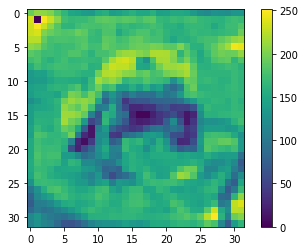

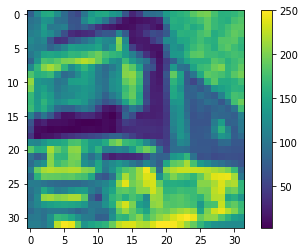

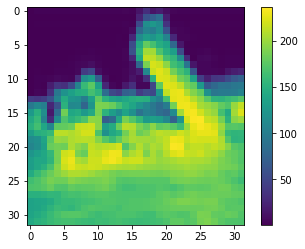

In [29]:
for i in np.arange(0, 3):
    plt.imshow((primera_capa[i, :, :, 1] * 255).astype(np.uint8))
    plt.colorbar()
    plt.show()

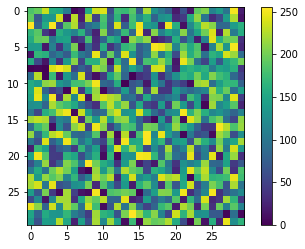

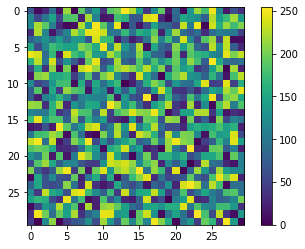

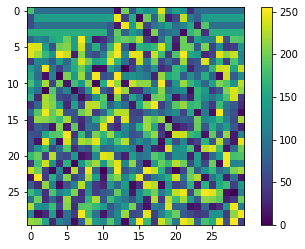

In [30]:
for i in np.arange(0, 3):
    plt.imshow((segunda_capa[i, :, :, 1] * 255).astype(np.uint8))
    plt.colorbar()
    plt.show()

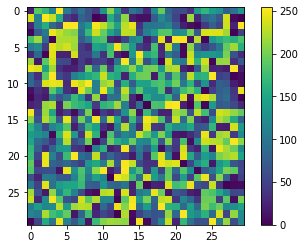

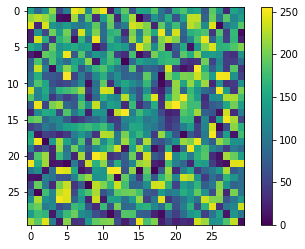

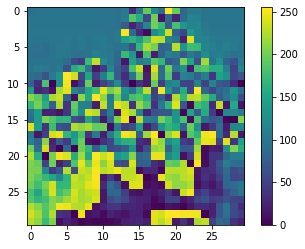

In [31]:
for i in np.arange(0, 3):
    plt.imshow((tercera_capa[i, :, :, 1] * 255).astype(np.uint8))
    plt.colorbar()
    plt.show()

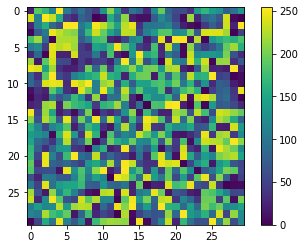

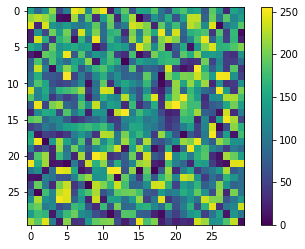

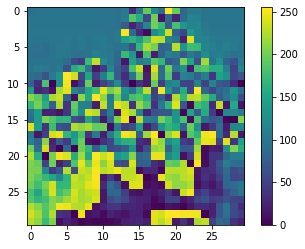

In [32]:
for i in np.arange(0, 3):
    plt.imshow((tercera_capa[i, :, :, 1] * 255).astype(np.uint8))
    plt.colorbar()
    plt.show()